In [36]:
#TASK 2

#Lookalike Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


In [23]:
dfcus = pd.read_csv("Customers.csv")
dfprod = pd.read_csv("Products.csv")
dftrans = pd.read_csv("Transactions.csv")

data = dftrans.merge(dfcus, on="CustomerID").merge(dfprod, on="ProductID")

In [24]:
customer_features = data.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity']])

In [25]:
# Train k-NN model
knn = NearestNeighbors(n_neighbors=4, metric='euclidean')
knn.fit(scaled_features)


NearestNeighbors(metric='euclidean', n_neighbors=4)

In [35]:

lookalikes = {}
for i in range(20):
    dist, idx = knn.kneighbors([scaled_features[i]])
    lookalikes[customer_features .iloc[i]['CustomerID']] = [(customer_features .iloc[j]['CustomerID'], dist[0][k]) for k, j in enumerate(idx[0][1:])]

# Save result
pd.DataFrame.from_dict(lookalikes, orient='index').to_csv("Kashish_Sharma_Lookalike.csv", header=False)

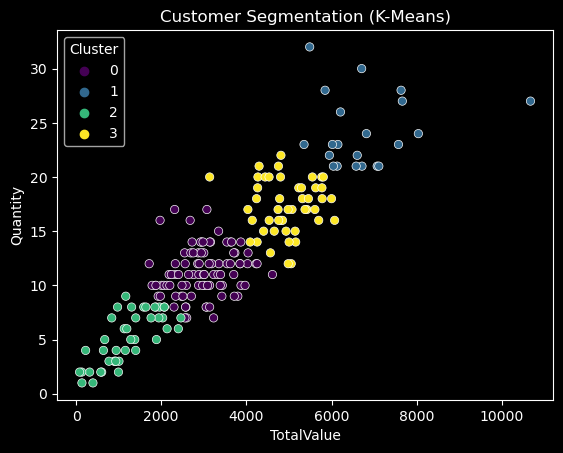

In [29]:
# Visualization- customer clusters
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Quantity'], hue=customer_features['Cluster'], palette='viridis')
plt.title("Customer Segmentation (K-Means)")
plt.show()